In [1]:
import numpy as np
import random # not very strong randomness. We don't care here.
#import secrets
import matplotlib.pyplot as plt

In [2]:
# Coverage

In [3]:
def coverage(n):
    (m,ncovered) = (0,0)
    covered = np.zeros(n)
    while ncovered < n:
        draw = random.randint(1, n);
        if covered[draw-1] == 0:
            covered[draw-1] = 1
            ncovered += 1
        m += 1
    return m

In [4]:
list_n = np.arange(10, 1001);
experiments_avg = np.zeros(np.size(list_n));
experiments_std = np.zeros(np.size(list_n));
for i in range(len(list_n)):
    coverages_trials = [coverage(list_n[i]) for _ in range(100)];
    experiments_avg[i] = np.mean(coverages_trials);
    experiments_std[i] = np.std(coverages_trials);

In [6]:
f = lambda n: n*sum(1/i for i in range(1, n+1))
g = lambda n: n*np.log(n)

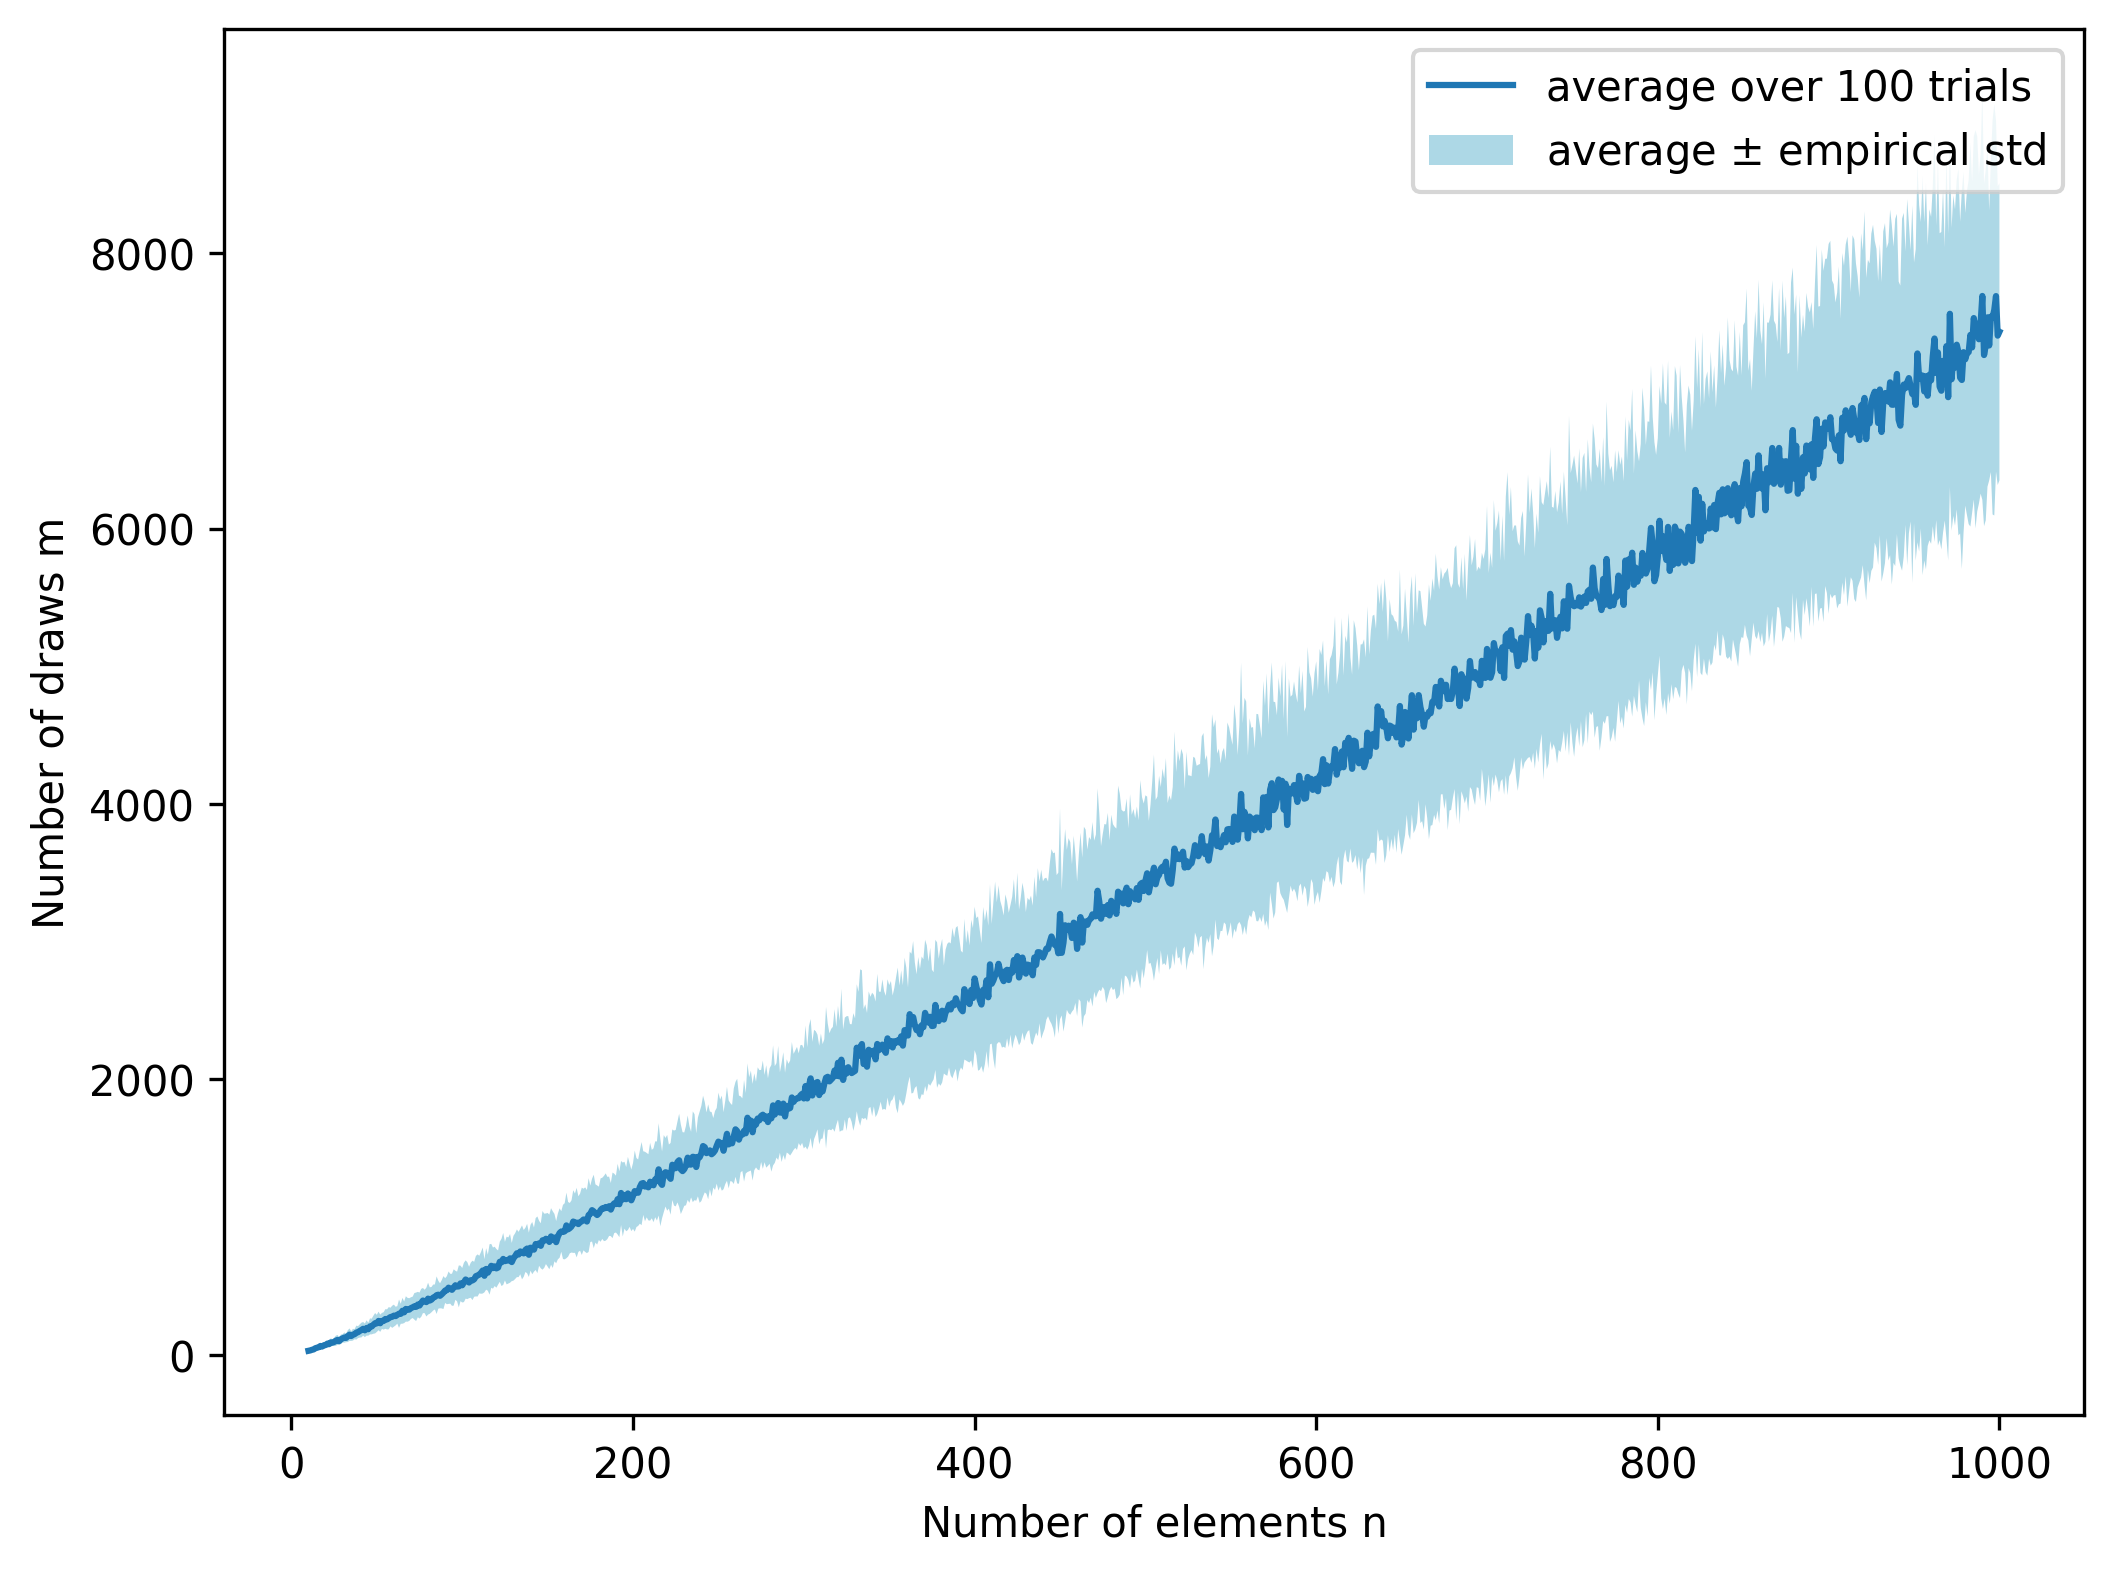

In [7]:
plt.figure(figsize=(8, 6), dpi=300)
plt.plot(list_n,experiments_avg, label='average over 100 trials')
plt.fill_between(list_n, 
                 experiments_avg-experiments_std, 
                 experiments_avg+experiments_std, facecolor='lightblue', 
                 label='average $\pm $ empirical std')
#plt.plot(list_n,list(map(f,list_n)), label='$nH_n$')
plt.ylabel('Number of draws m')
plt.xlabel('Number of elements n')
plt.legend(loc='best')
plt.show()

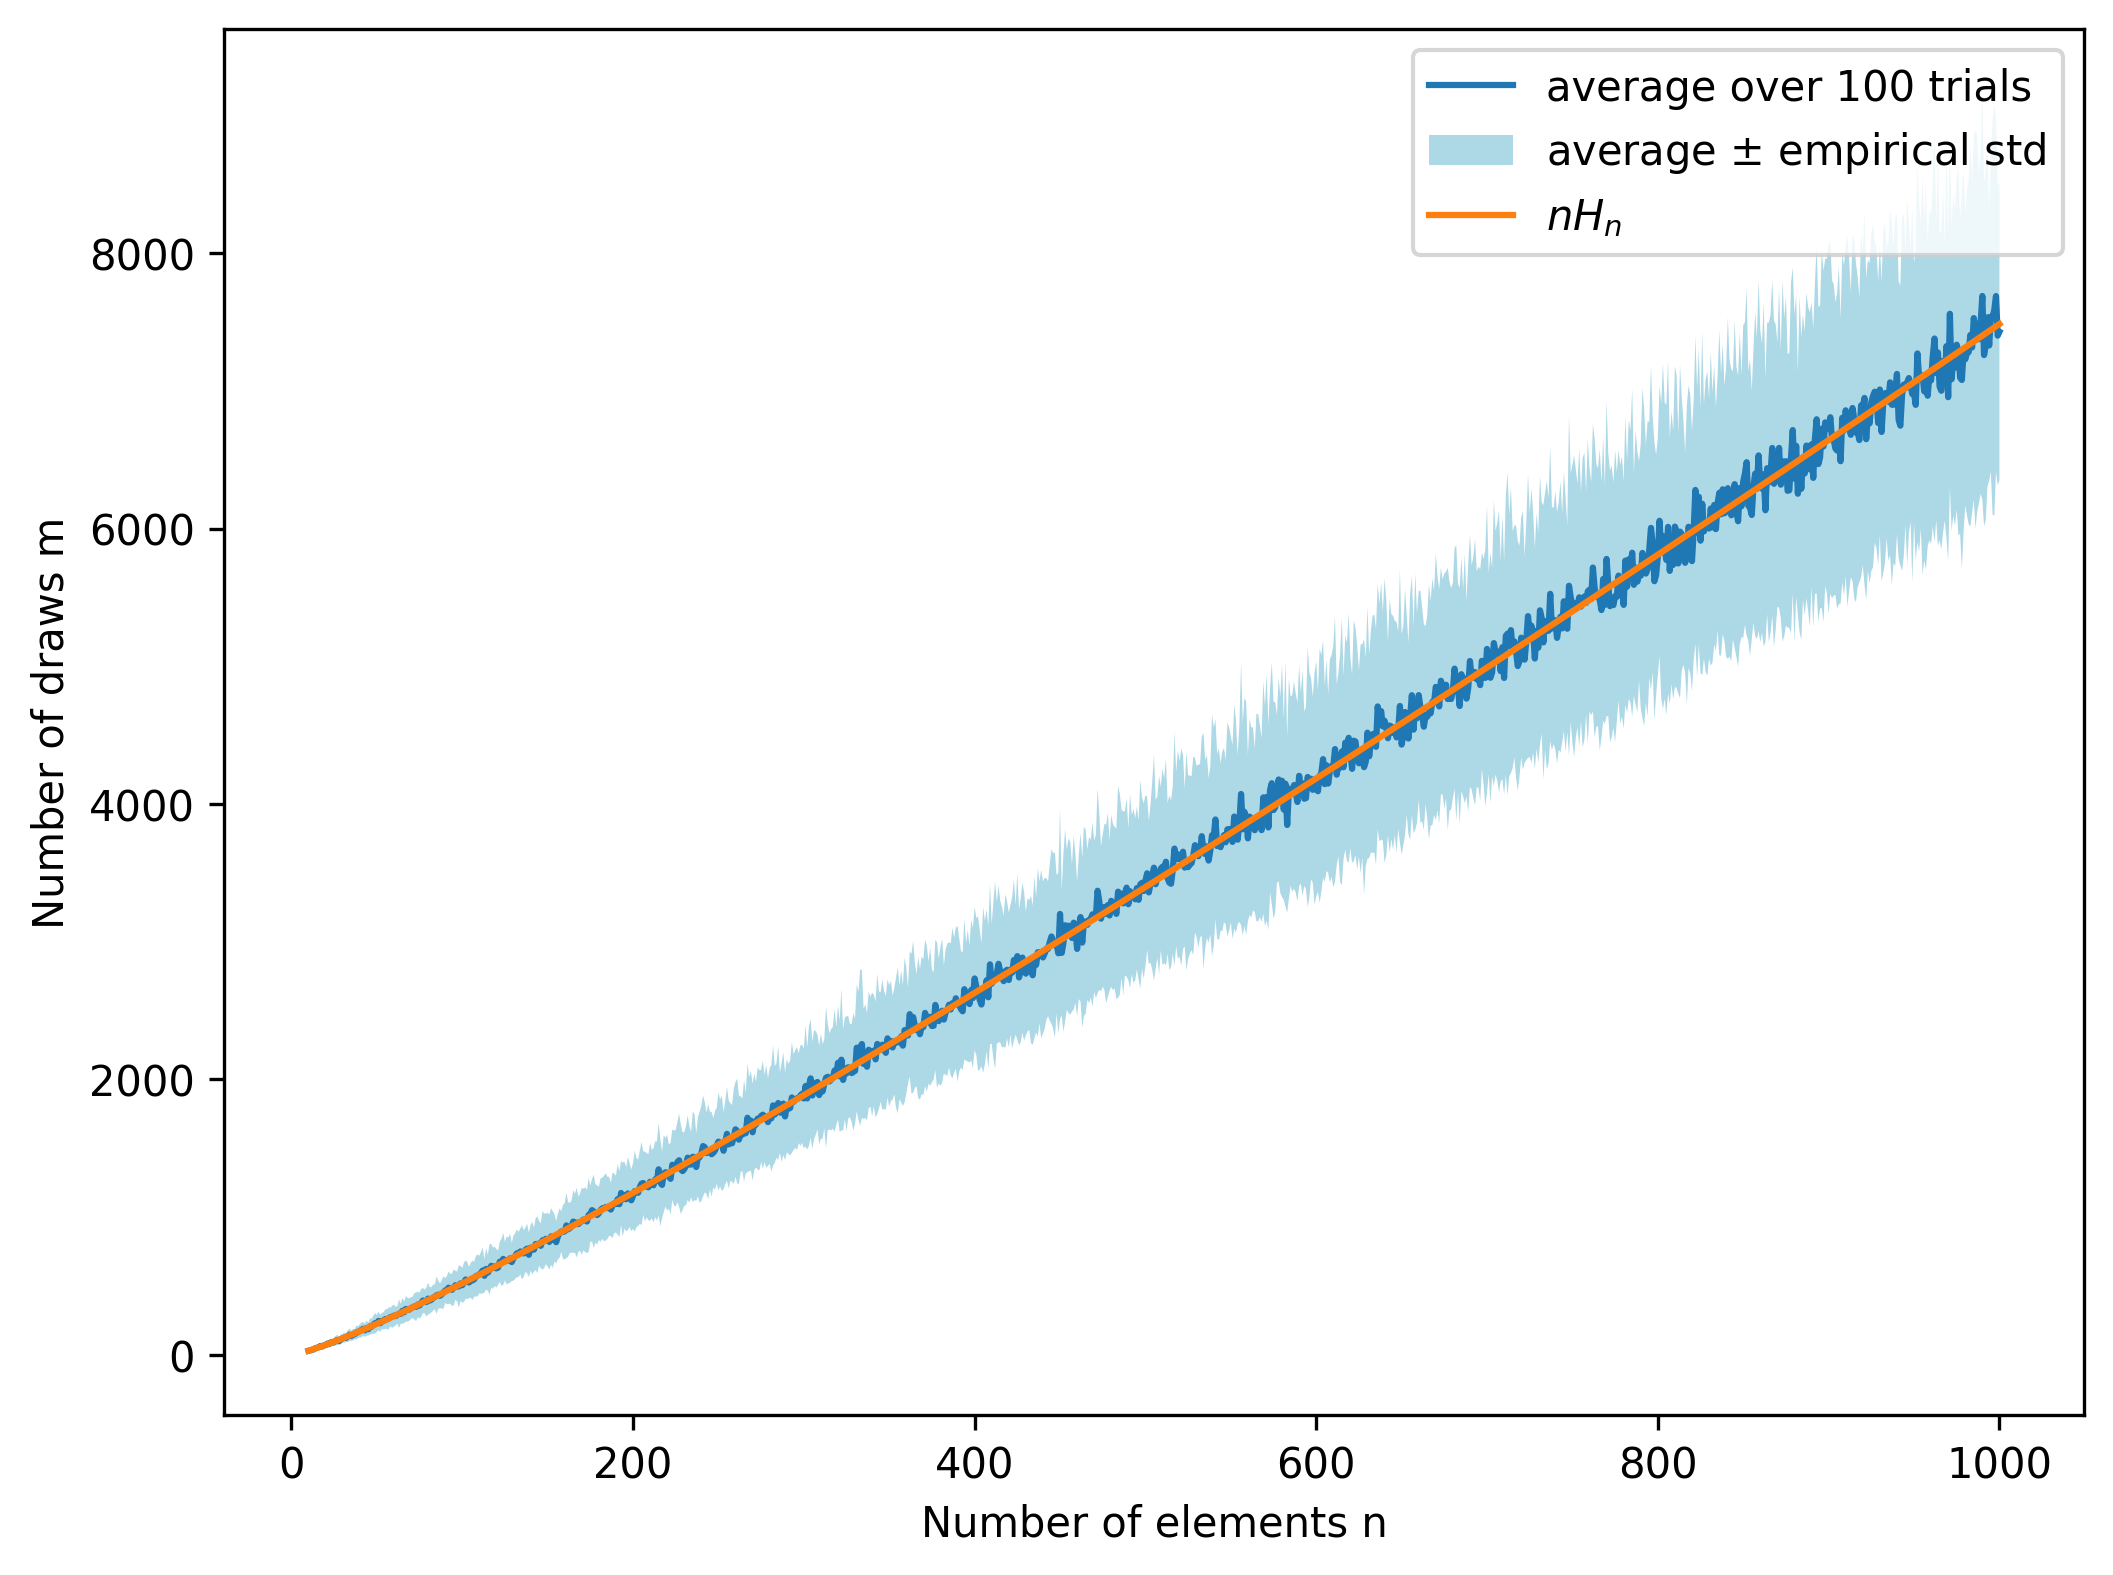

In [8]:
plt.figure(figsize=(8, 6), dpi=300)
plt.plot(list_n,experiments_avg, label='average over 100 trials')
plt.fill_between(list_n, 
                 experiments_avg-experiments_std, 
                 experiments_avg+experiments_std, facecolor='lightblue', 
                 label='average $\pm $ empirical std')
plt.plot(list_n,list(map(f,list_n)), label='$nH_n$')
plt.ylabel('Number of draws m')
plt.xlabel('Number of elements n')
plt.legend(loc='best')
plt.show()

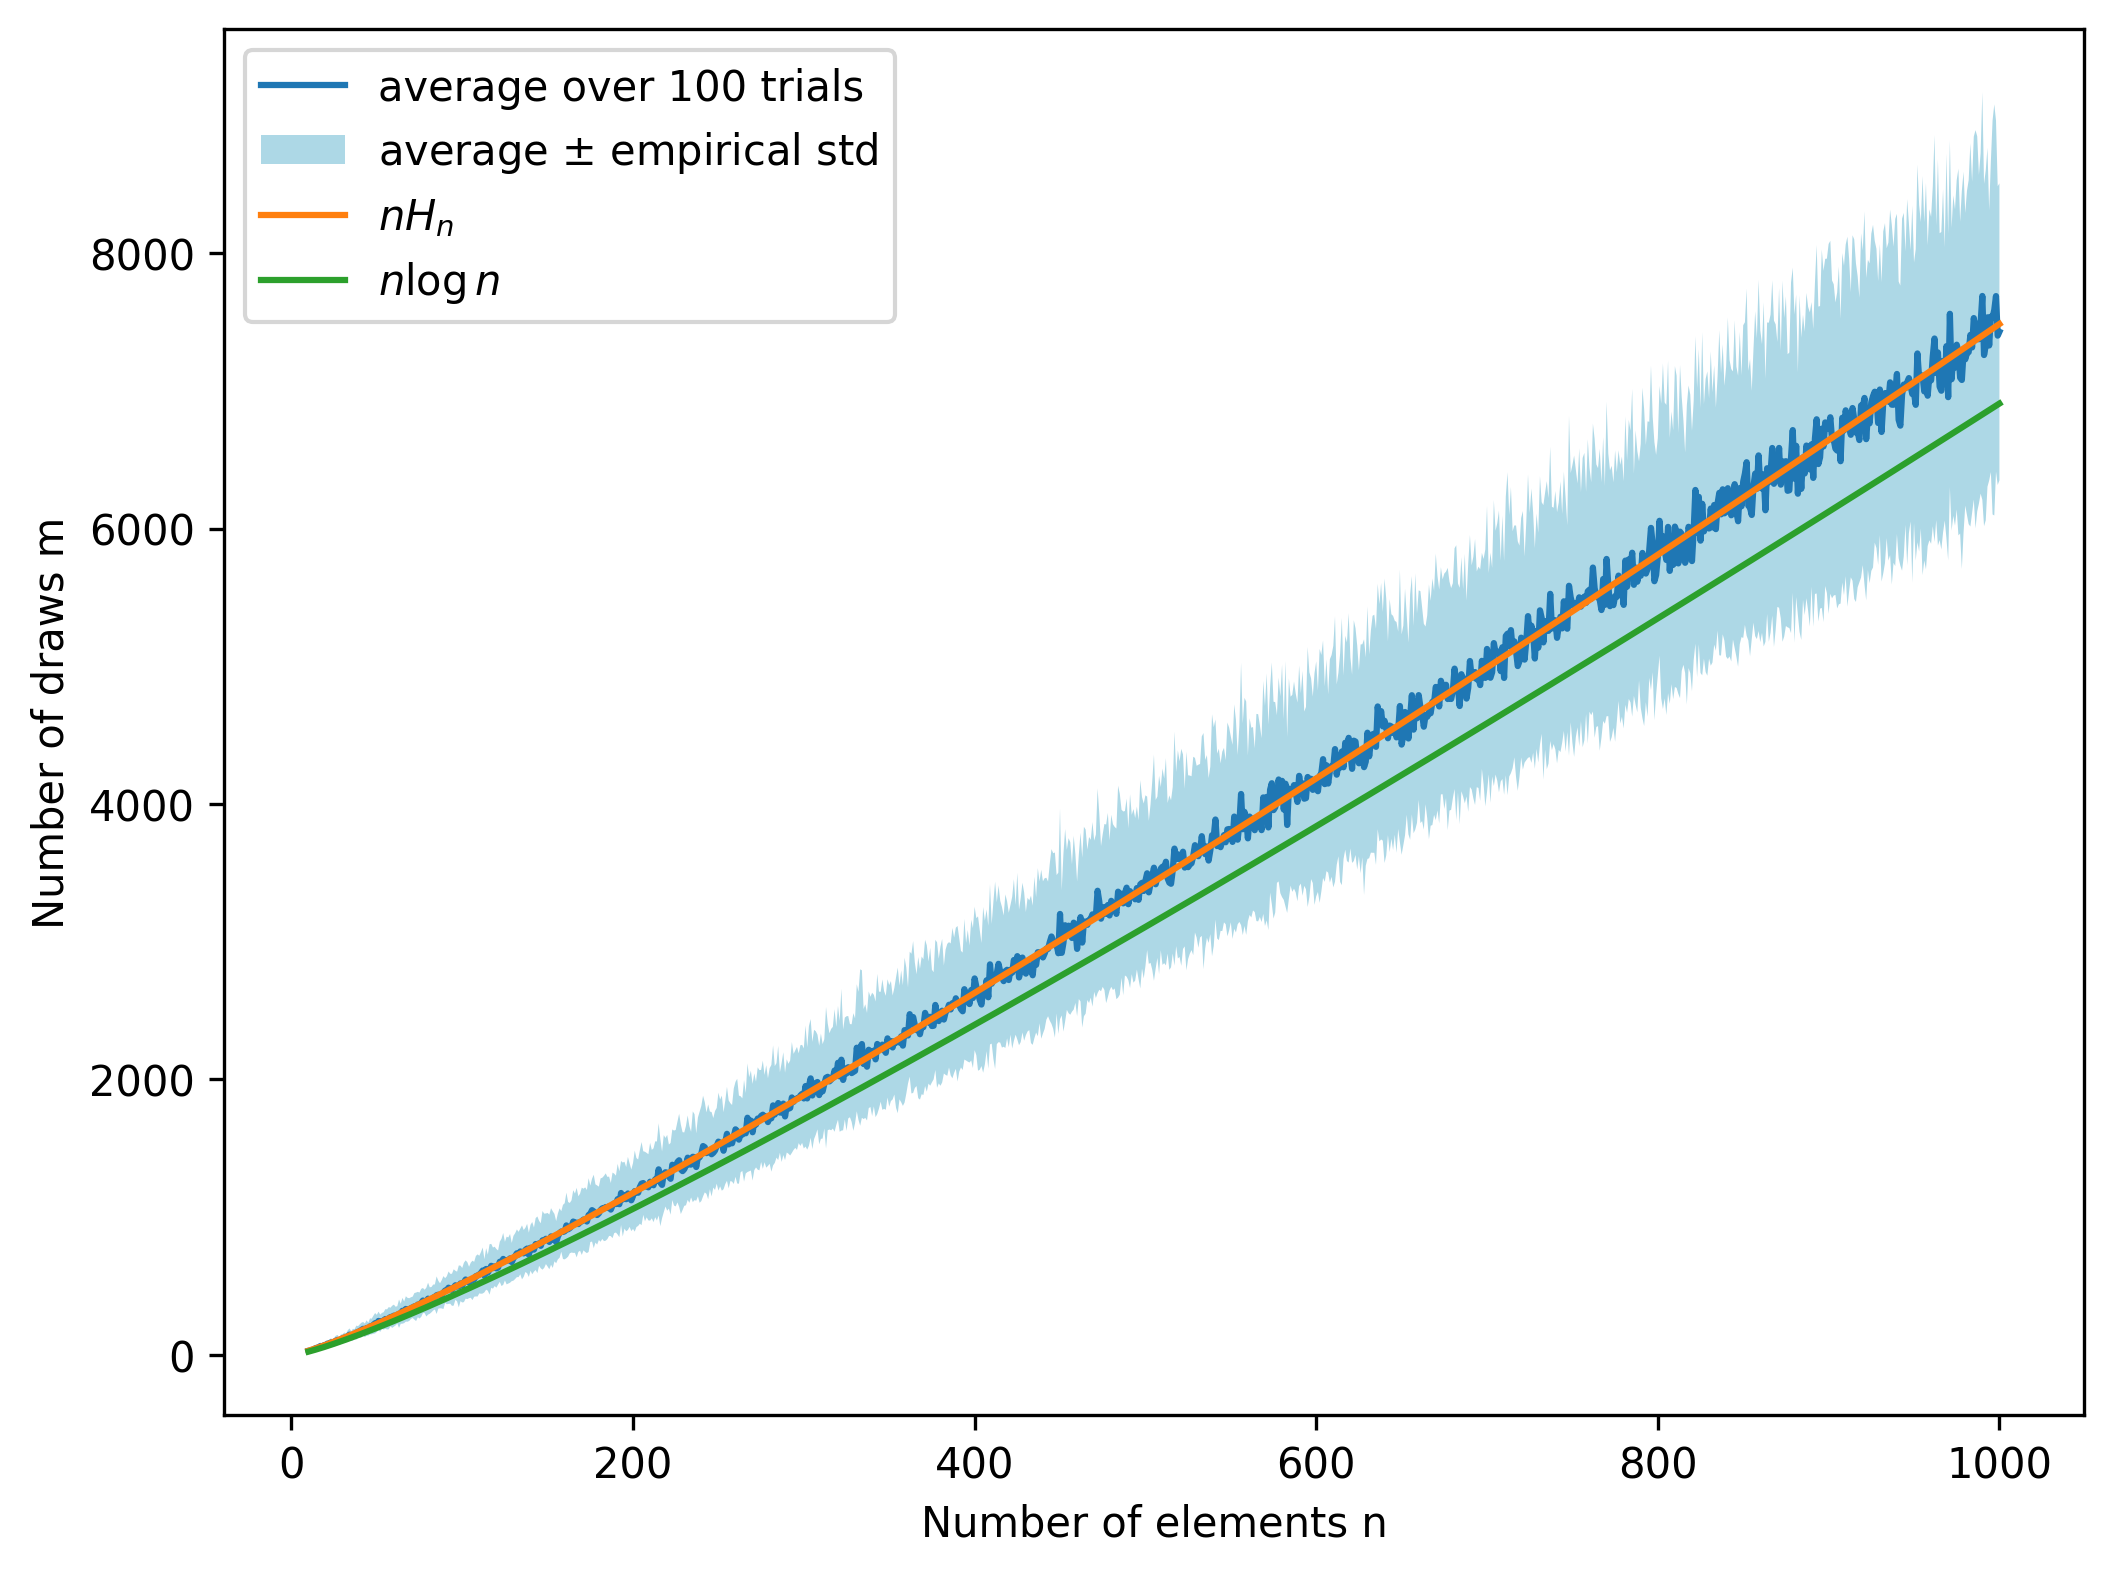

In [9]:
plt.figure(figsize=(8, 6), dpi=300)
plt.plot(list_n,experiments_avg, label='average over 100 trials')
plt.fill_between(list_n, 
                 experiments_avg-experiments_std, 
                 experiments_avg+experiments_std, facecolor='lightblue', 
                 label='average $\pm $ empirical std')
plt.plot(list_n,list(map(f,list_n)), label='$n H_n$')
plt.plot(list_n,list(map(g,list_n)), label='$n\log n$')
plt.ylabel('Number of draws m')
plt.xlabel('Number of elements n')
plt.legend(loc='best')
plt.show()

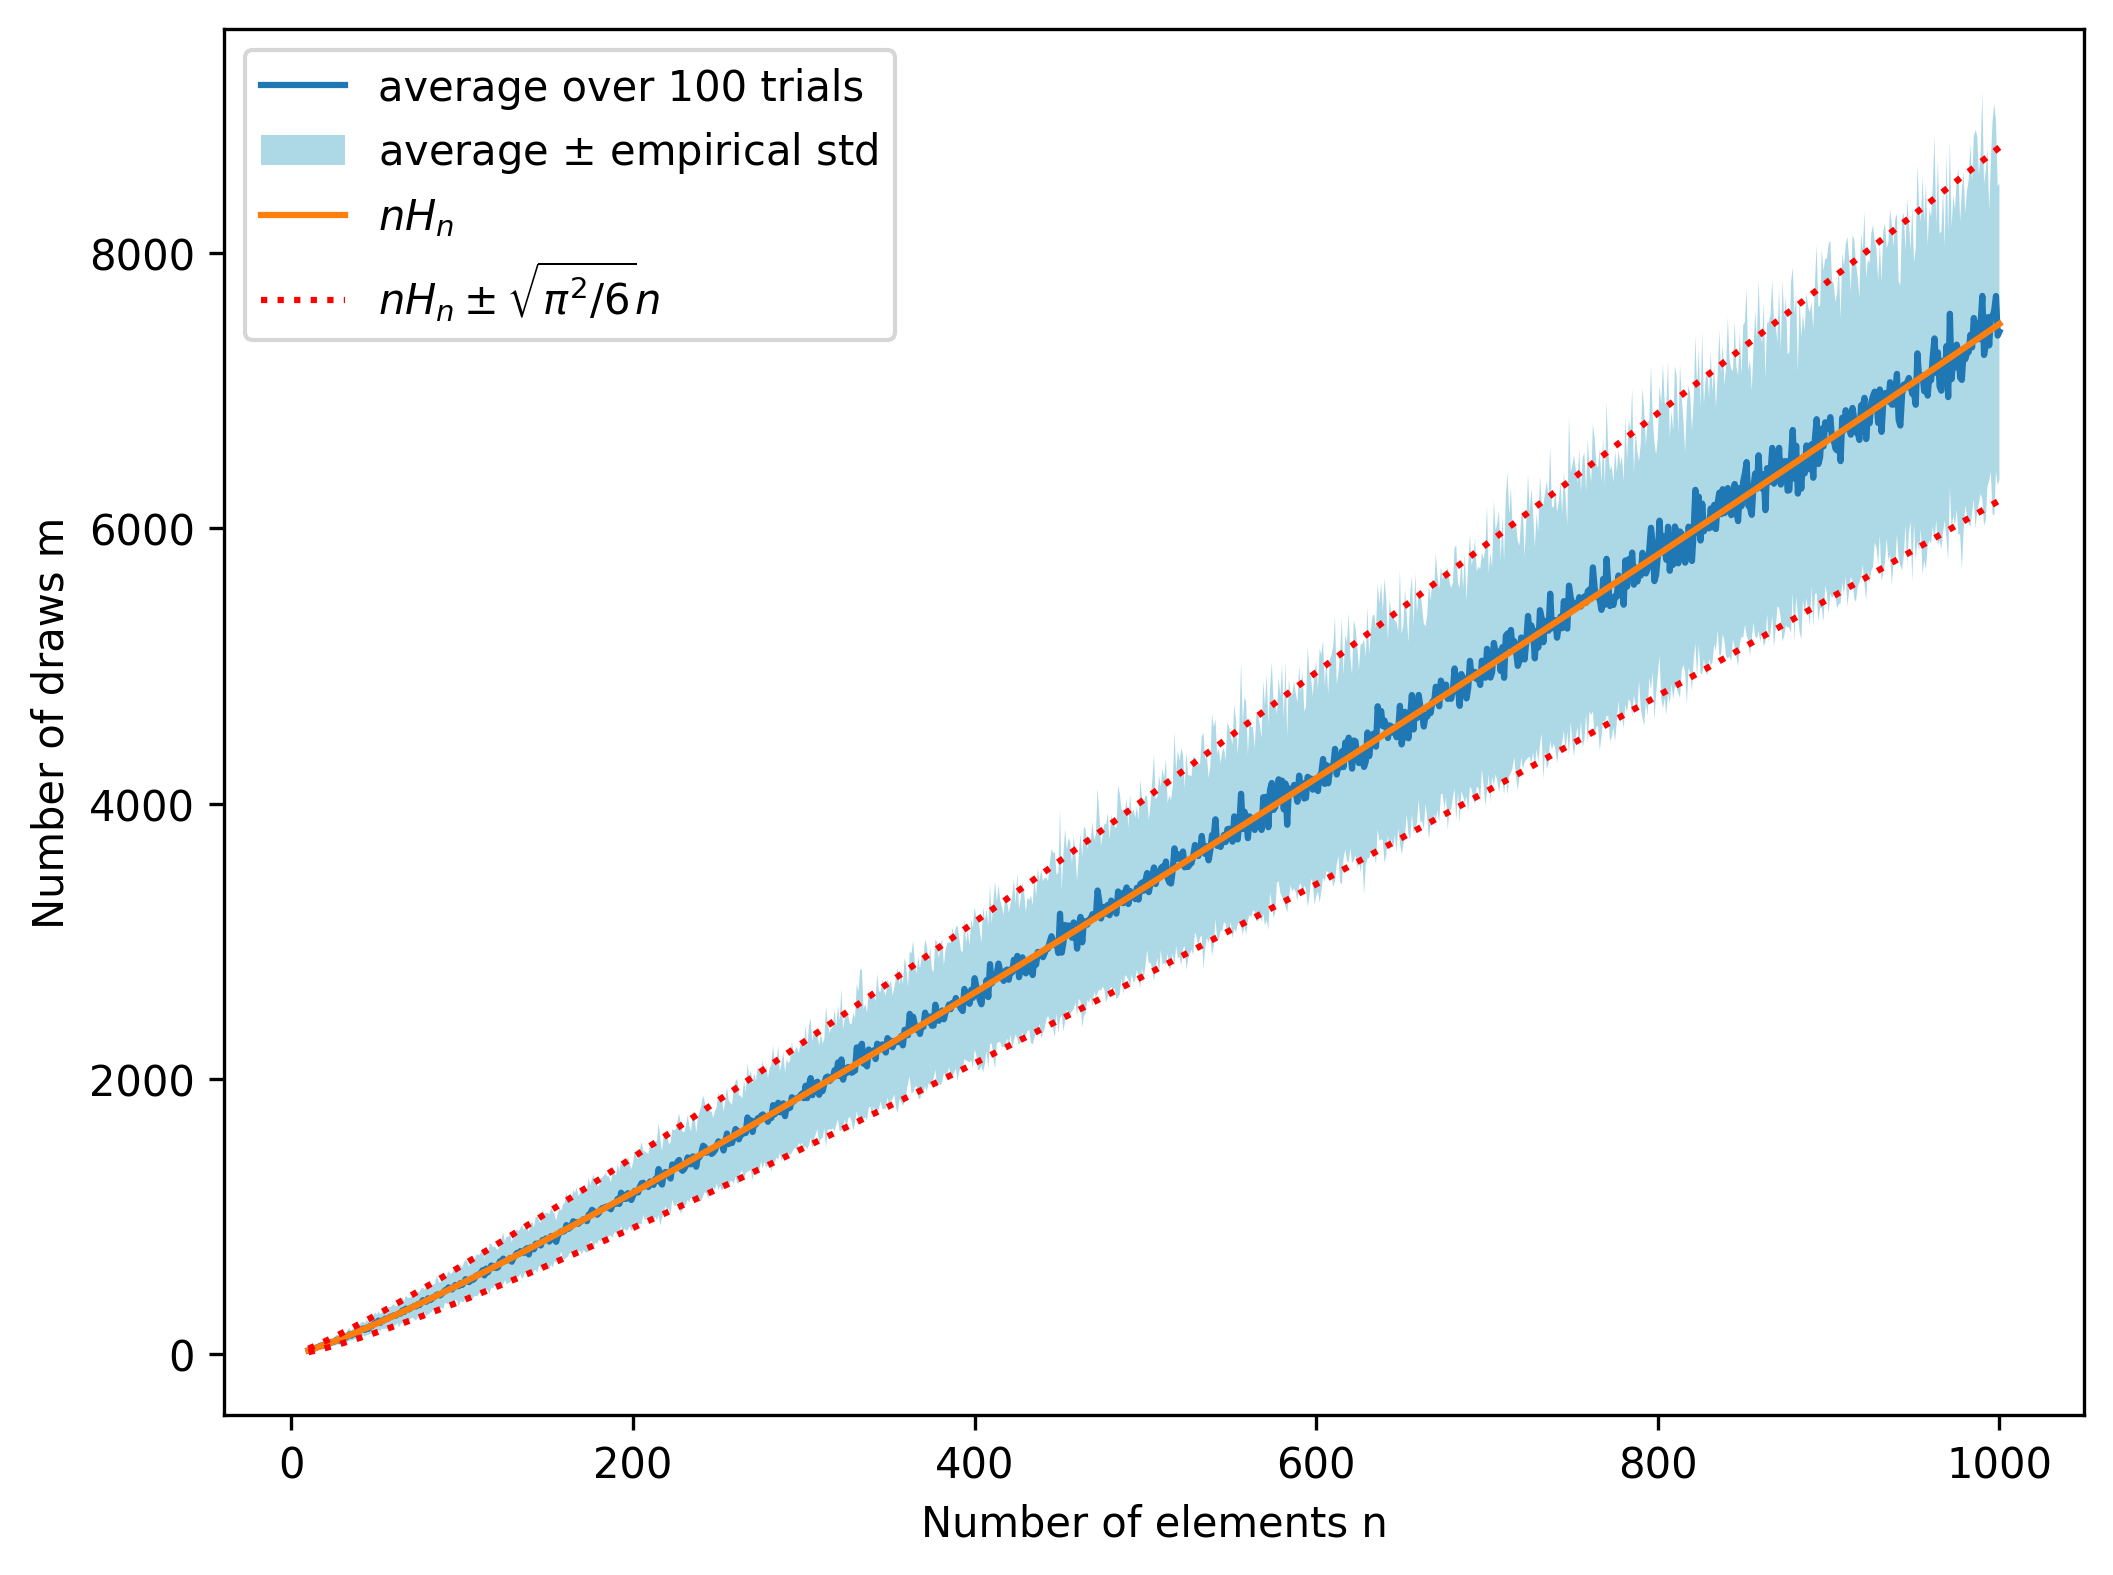

In [10]:
plt.figure(figsize=(8, 6), dpi=300)
plt.plot(list_n,experiments_avg, label='average over 100 trials')
plt.fill_between(list_n, experiments_avg-experiments_std, 
                 experiments_avg+experiments_std, 
                 facecolor='lightblue', 
                 label='average $\pm$ empirical std')
plt.plot(list_n,list(map(f,list_n)), label='$nH_n$')
plt.plot(list_n,list(map(f,list_n))+np.sqrt(np.pi**2/6)*list_n, 'r:', label='$nH_n\pm\sqrt{\pi^2/6}n$')
plt.plot(list_n,list(map(f,list_n))-np.sqrt(np.pi**2/6)*list_n, 'r:')
plt.ylabel('Number of draws m')
plt.xlabel('Number of elements n')
plt.legend(loc='best')
plt.show()

In [11]:
# Max load

In [12]:
def maxload(n,m):
    loads = np.zeros(n, dtype=int)
    for _ in range(m):
        draw = random.randint(1, n);
        loads[draw-1] += 1
    return np.max(loads)

In [13]:
list_n = np.arange(10, 1001);
experiments_maxload_avg = np.zeros(np.size(list_n));
experiments_maxload_std = np.zeros(np.size(list_n));
for i in range(len(list_n)):
    maxload_trials = [maxload(list_n[i],list_n[i]) for _ in range(100)];
    experiments_maxload_avg[i] = np.mean(maxload_trials);
    experiments_maxload_std[i] = np.std(maxload_trials);

In [14]:
#h = lambda n: np.log(n)/np.log(np.log(np.e*n))

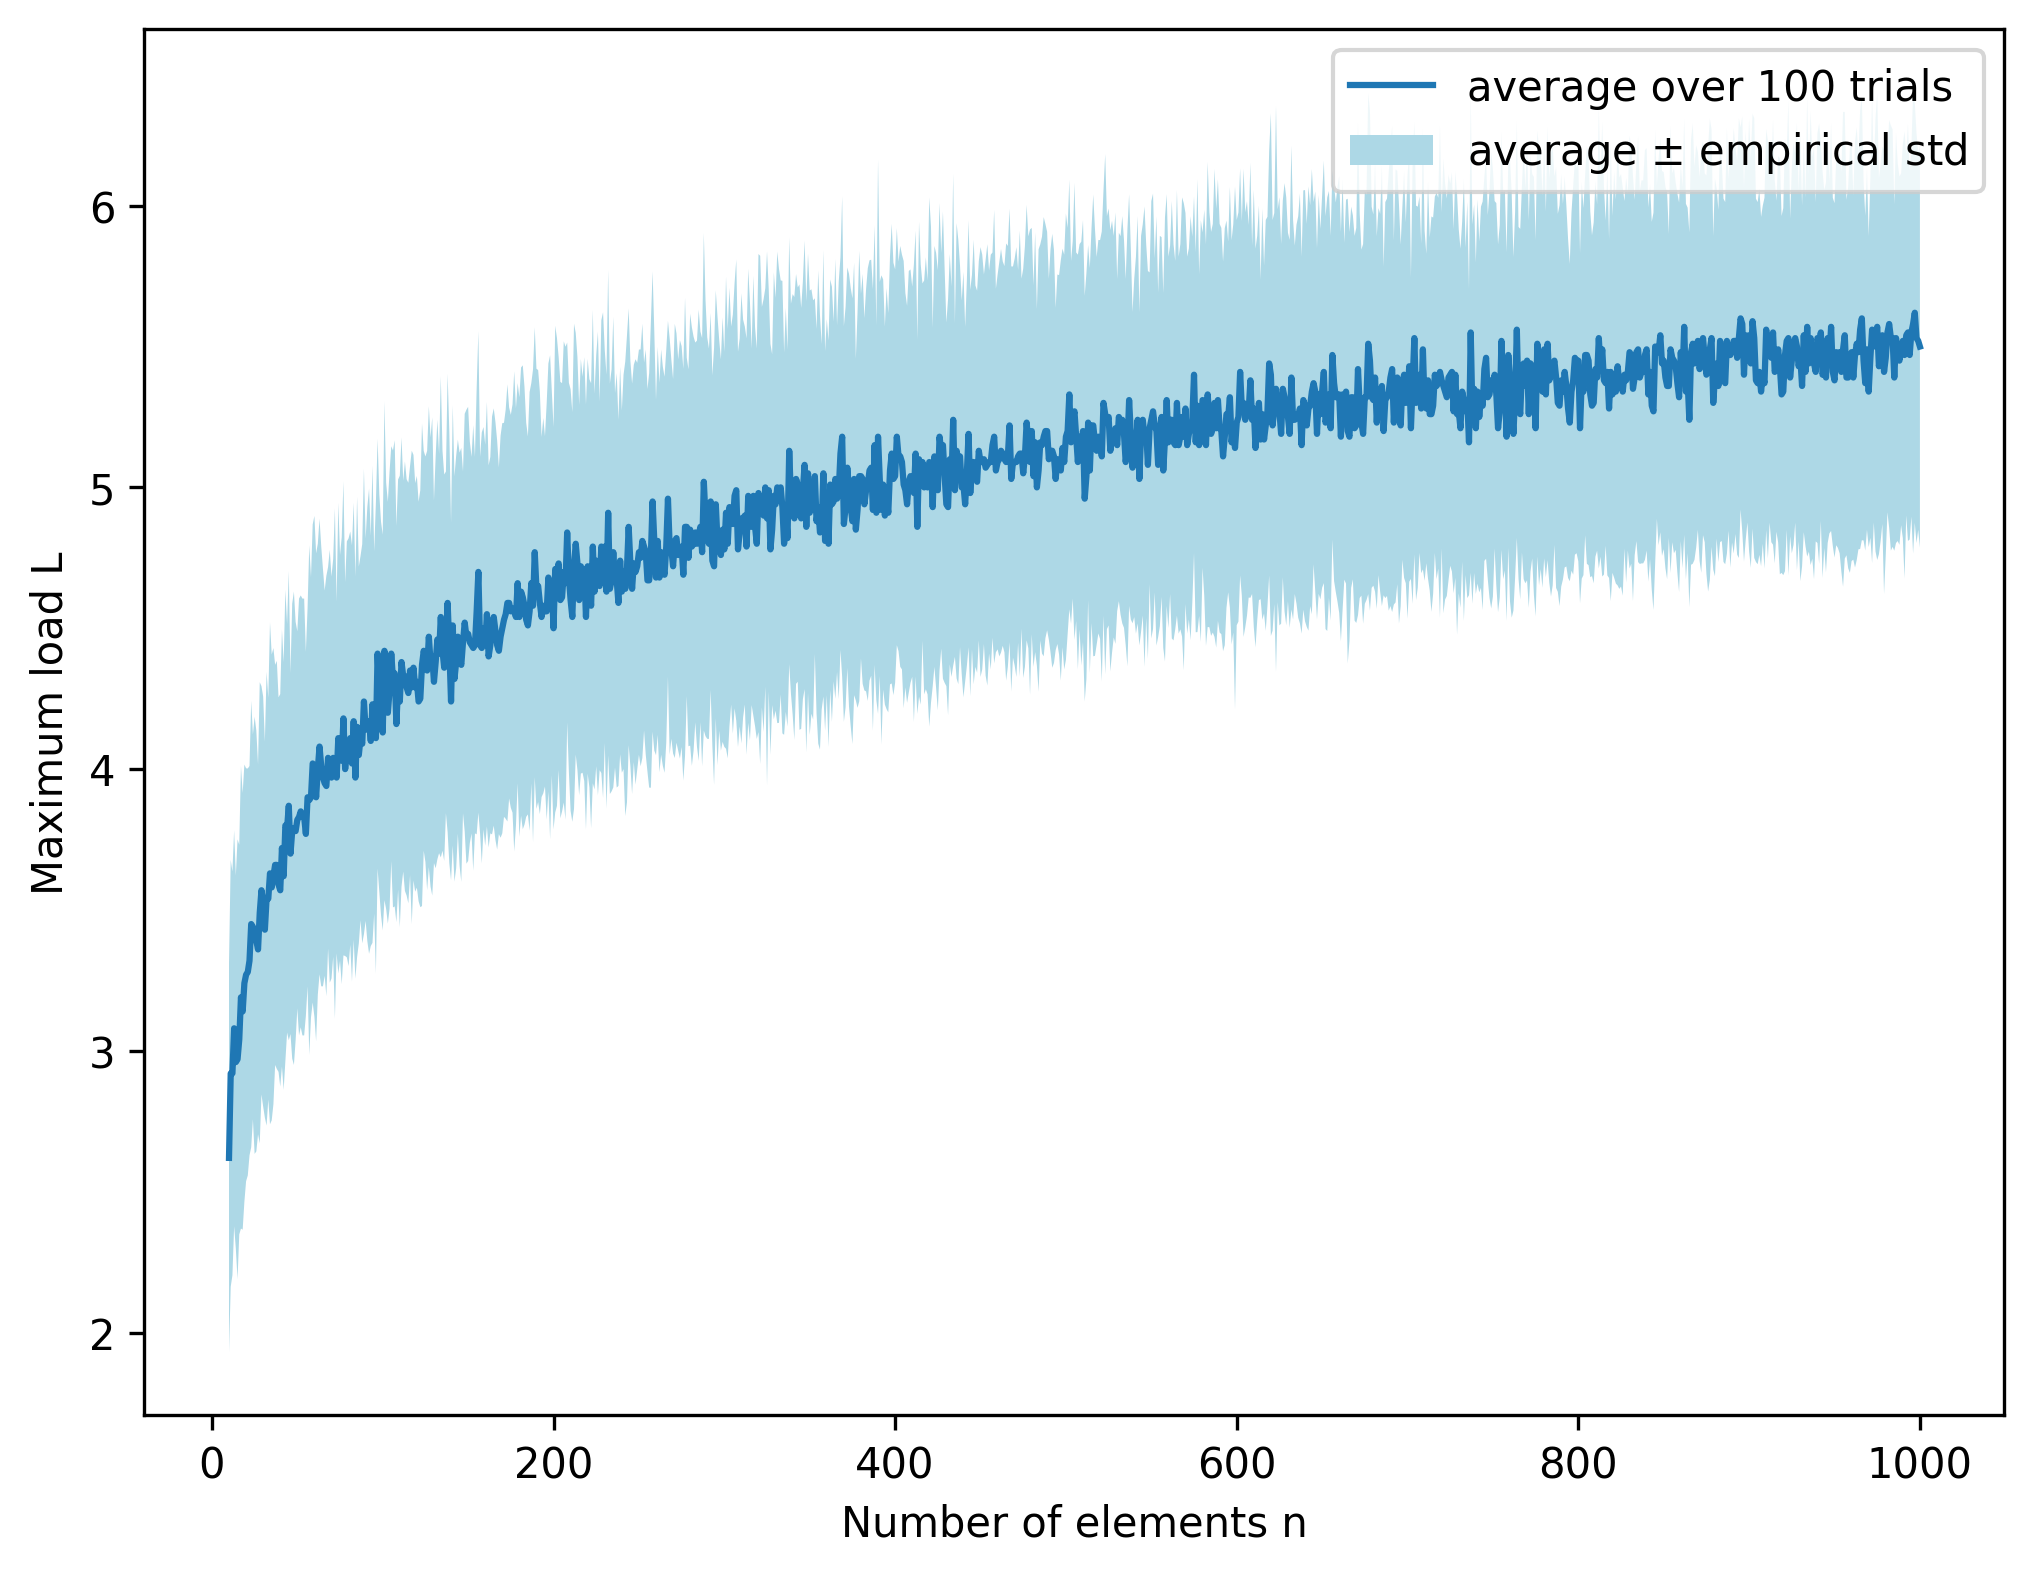

In [23]:
plt.figure(figsize=(8, 6), dpi=300)
plt.plot(list_n,experiments_maxload_avg, label='average over 100 trials')
plt.fill_between(list_n, 
                 experiments_maxload_avg-experiments_maxload_std, 
                 experiments_maxload_avg+experiments_maxload_std, facecolor='lightblue', 
                 label='average $\pm $ empirical std')
plt.ylabel('Maximum load L')
plt.xlabel('Number of elements n')
plt.legend(loc='best')
plt.show()

In [16]:
# Power of two choices
def maxload2choices(n,m):
    loads = np.zeros(n, dtype=int)
    for _ in range(m):
        draw1 = random.randint(1, n);
        draw2 = random.randint(1, n);
        if loads[draw2-1] > loads[draw1-1]:
            loads[draw1-1] += 1
        else:
            loads[draw2-1] += 1
    return np.max(loads)

In [54]:
list_n = np.arange(10, 1001);
experiments_maxload2choices_avg = np.zeros(np.size(list_n));
experiments_maxload2choices_std = np.zeros(np.size(list_n));
for i in range(len(list_n)):
    maxload2choices_trials = [maxload2choices(list_n[i],list_n[i]) for _ in range(500)];
    experiments_maxload2choices_avg[i] = np.mean(maxload2choices_trials);
    experiments_maxload2choices_std[i] = np.std(maxload2choices_trials);

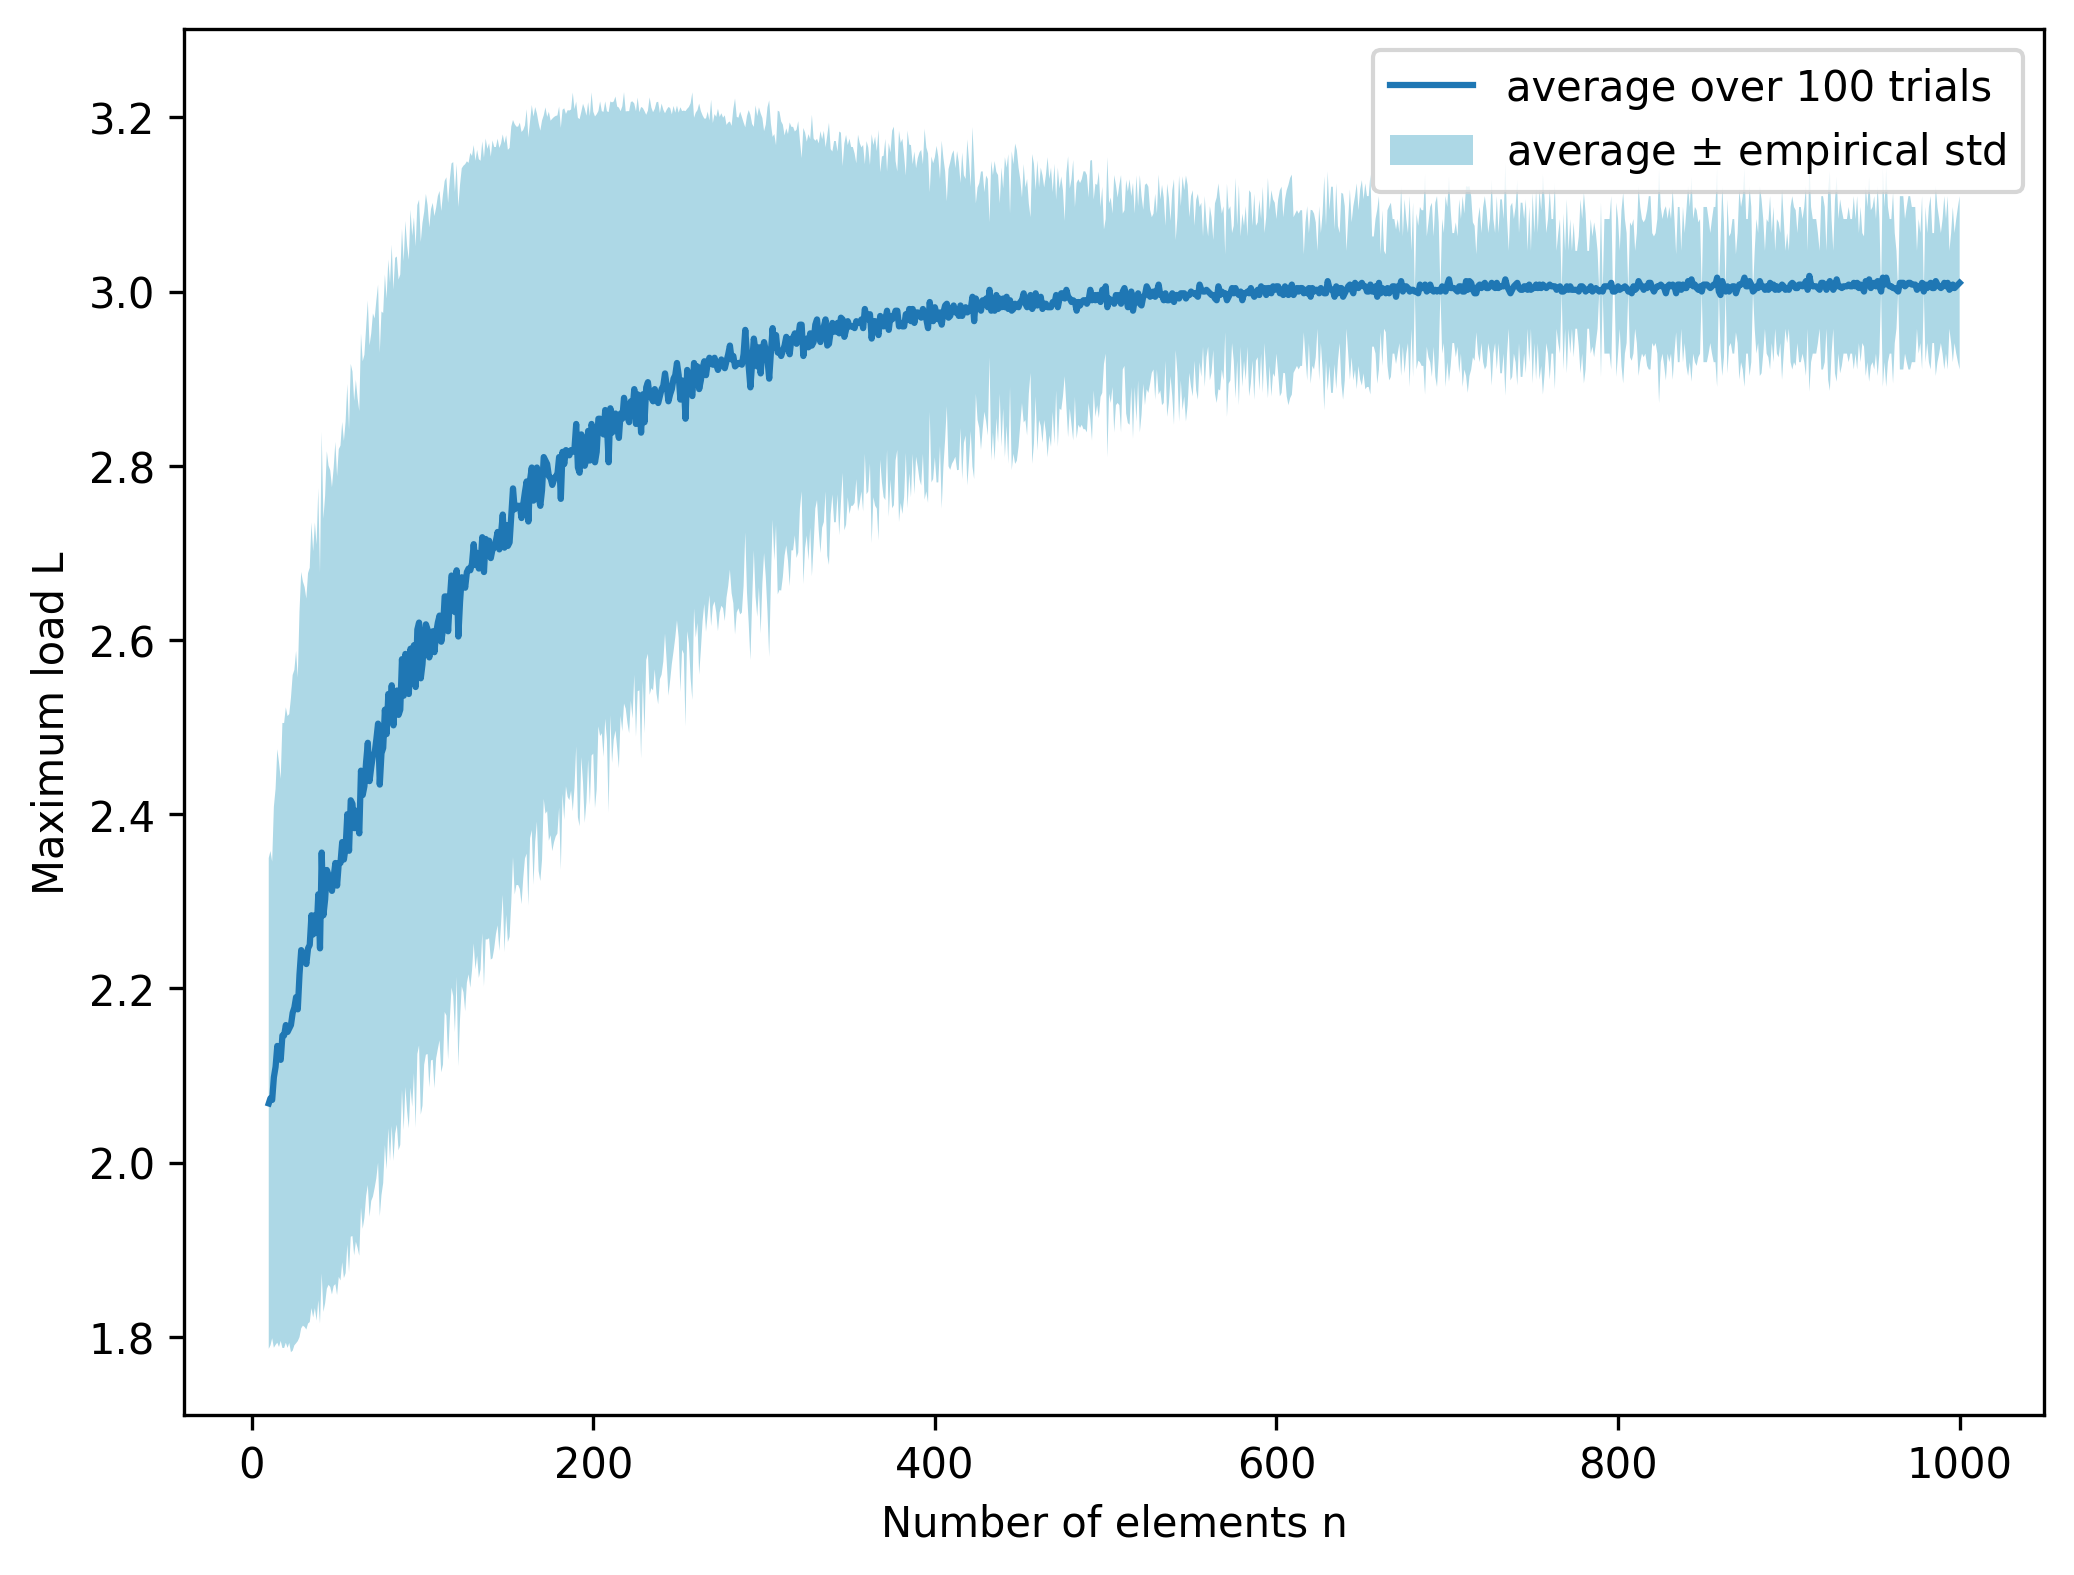

In [55]:
plt.figure(figsize=(8, 6), dpi=300)
plt.plot(list_n,experiments_maxload2choices_avg, label='average over 100 trials')
plt.fill_between(list_n, 
                 experiments_maxload2choices_avg-experiments_maxload2choices_std, 
                 experiments_maxload2choices_avg+experiments_maxload2choices_std, facecolor='lightblue', 
                 label='average $\pm $ empirical std')
plt.ylabel('Maximum load L')
plt.xlabel('Number of elements n')
plt.legend(loc='best')
plt.show()